In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

import shutil
import os

from pathlib import Path
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

from keras.callbacks import EarlyStopping
early_stoping = EarlyStopping(patience=7)

In [4]:
# original_dataset_dir = 'padding/class_000'
# original_dataset_dir

'padding/class_000'

In [12]:
# os.mkdir('cnn_test')

In [13]:
# base = ('cnn_test')

In [17]:
# train_path = Path('./cnn_test/train') # train test로 구분한 파일 저장 경로
# test_path = Path('./cnn_test/test')

# train_path.mkdir(exist_ok=True)
# test_path.mkdir(exist_ok=True)

In [18]:
# data_path = Path('./padding/') # 원본 파일들 저장 경로
# data = []
# for d in data_path.glob('*'):
#     for f in d.glob('*.jpg'):
#         data.append([f, d.stem])
# data = np.array(data)
# data

array([[WindowsPath('padding/class_000/class_000_000.jpg'), 'class_000'],
       [WindowsPath('padding/class_000/class_000_001.jpg'), 'class_000'],
       [WindowsPath('padding/class_000/class_000_002.jpg'), 'class_000'],
       ...,
       [WindowsPath('padding/class_019/class_019_034.jpg'), 'class_019'],
       [WindowsPath('padding/class_019/class_019_035.jpg'), 'class_019'],
       [WindowsPath('padding/class_019/class_019_036.jpg'), 'class_019']],
      dtype=object)

In [11]:
# for label in labels:
#     train_label_dir = os.path.join(train_dir,label)
#     os.mkdir(train_label_dir)

In [ ]:
# for label in labels:
#     test_label_dir = os.path.join(test_dir,label)
#     os.mkdir(train_test_dir)
    
# for label in labels:
#     validation_label_dir = os.path.join(validation_dir,label)
#     os.mkdir(train_label_dir)

In [19]:
# ss = StratifiedShuffleSplit(1, train_size = 0.8) # 얘가 핵심, Stratify 유지하면서 쪼개주는 역할
# train_ix, test_ix = next(ss.split(data[:,0],data[:,1])) # next가 뭐하는 놈인지 기억안난다 암튼 나눠준거다
# train_ix

array([301,  12, 338, 316, 303,  23, 291, 465, 361, 342, 640, 487, 228,
       137, 481, 157, 600, 165, 289, 315, 336, 510, 235, 243, 310, 244,
       424, 395, 580,  84, 456, 408, 654,  15, 208, 506,  76, 236, 179,
       473, 238, 193,  36, 141, 173,  87, 457, 441, 455, 625, 593, 558,
       110,  35, 329, 392, 612, 529, 393, 415, 346, 433, 642, 317,  98,
       617,  80, 578, 365, 375, 583, 222, 413, 503,  44, 637, 120, 344,
       358, 280, 464, 602, 383, 396, 118, 635, 332,  64, 536, 113, 480,
        68, 328, 614, 623, 575, 194,  93, 368, 485, 440, 200, 469, 618,
        67, 399, 532, 268, 479, 233, 362, 227, 371, 297, 279, 548, 620,
       496, 616, 652, 122, 629, 140, 319, 153,   6,  70, 648, 571, 131,
       374, 438, 561, 530, 126, 430, 447, 606, 147,  86, 234, 407, 112,
       134, 320, 556, 452, 269, 176, 639, 307, 142, 537, 305, 304, 300,
       323, 463, 524, 340,  65, 152, 570, 605,  25, 405, 253, 204, 379,
        91,  18, 326, 357, 598, 117, 377, 422, 547, 382, 156, 27

In [20]:
# train_set, test_set = data[train_ix], data[test_ix]
# train_set

array([[WindowsPath('padding/class_008/class_008_005.jpg'), 'class_008'],
       [WindowsPath('padding/class_000/class_000_012.jpg'), 'class_000'],
       [WindowsPath('padding/class_008/class_008_042.jpg'), 'class_008'],
       ...,
       [WindowsPath('padding/class_005/class_005_026.jpg'), 'class_005'],
       [WindowsPath('padding/class_007/class_007_021.jpg'), 'class_007'],
       [WindowsPath('padding/class_001/class_001_030.jpg'), 'class_001']],
      dtype=object)

In [21]:
# for p, c in train_set:
#     (train_path / c).mkdir(exist_ok=True)
#     shutil.move(p, train_path.joinpath(*p.parts[-2:]))
# for p, c in test_set:
#     (test_path / c).mkdir(exist_ok=True)
#     shutil.move(p, test_path.joinpath(*p.parts[-2:]))

In [4]:
train_set.shape

NameError: name 'train_set' is not defined

In [25]:
test_set.shape

(131, 2)

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
    'e:/smallclass/train/',
    target_size=(160,160),
    batch_size=20,
    class_mode='categorical'
)

Found 18134 images belonging to 73 classes.


In [33]:
test_generator = test_datagen.flow_from_directory(
    'e:/smallclass/test/',
    target_size=(160,160),
    batch_size=20,
    class_mode='categorical'

)

Found 6960 images belonging to 73 classes.


In [34]:
val_generator = val_datagen.flow_from_directory(
    'e:/smallclass/val/',
    target_size=(160,160),
    batch_size=20,
    class_mode='categorical'

)

Found 6870 images belonging to 73 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 160, 160, 3)
(20, 73)


In [35]:
model=Sequential()
model.add(Conv2D(16, kernel_size=5, padding='same', activation='relu', input_shape=(160, 160, 3)))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))

model.add(Flatten())

model.add(Dense(516, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(73, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 160, 160, 16)      1216      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 53, 53, 32)        12832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 17, 17, 32)        25632     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 32)        

In [36]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

In [37]:
hist = model.fit(train_generator, epochs=10, steps_per_epoch= train_generator.samples//train_generator.batch_size,
                 validation_data=val_generator, validation_steps= val_generator.samples//val_generator.batch_size,
                )

Epoch 1/10
906/906 [==============================] - 406s 447ms/step - loss: 4.1239 - accuracy: 0.0464 - val_loss: 3.8405 - val_accuracy: 0.0983
Epoch 2/10
906/906 [==============================] - 133s 147ms/step - loss: 3.6623 - accuracy: 0.1030 - val_loss: 3.4915 - val_accuracy: 0.1356
Epoch 3/10
906/906 [==============================] - 135s 149ms/step - loss: 3.2950 - accuracy: 0.1728 - val_loss: 3.2737 - val_accuracy: 0.1945
Epoch 4/10
906/906 [==============================] - 135s 149ms/step - loss: 2.9713 - accuracy: 0.2396 - val_loss: 3.0926 - val_accuracy: 0.2360
Epoch 5/10
906/906 [==============================] - 133s 147ms/step - loss: 2.7130 - accuracy: 0.2958 - val_loss: 3.0322 - val_accuracy: 0.2480
Epoch 6/10
906/906 [==============================] - 134s 148ms/step - loss: 2.4980 - accuracy: 0.3375 - val_loss: 3.0345 - val_accuracy: 0.2663
Epoch 7/10
906/906 [==============================] - 134s 148ms/step - loss: 2.3264 - accuracy: 0.3750 - val_loss: 3.0314 -

In [ ]:
# 전체데이터수(n) * epochs(전체데이터수를 몇번 훈련시킬지) = step_per_epoch * batch_size

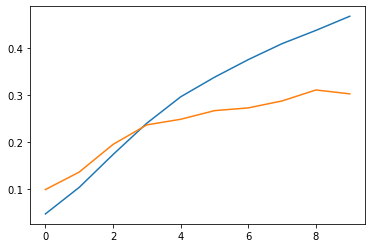

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

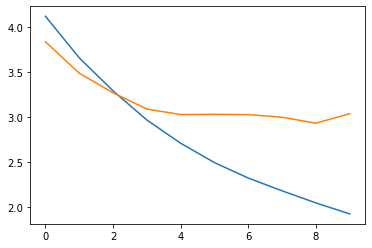

In [39]:
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss'])

In [40]:
model.evaluate(test_generator)

348/348 [==============================] - 100s 288ms/step - loss: 3.0351 - accuracy: 0.3014


[3.0351130962371826, 0.30143678188323975]